In [1]:
import os
import sys

# Get the directory of the current notebook 
notebook_dir_path = os.path.dirname(os.path.abspath('__file__'))
project_path = os.path.join(notebook_dir_path, '..') # Change this

sys.path.append(notebook_dir_path)
sys.path.append(project_path)

from struct import unpack
from collections import defaultdict
import math
import os
import matplotlib.pyplot as plt
import binascii
import json
import numpy as np
from IPython.display import display, Markdown

# Setup

In [2]:
total_num_of_images = 200 # Example value, set this to the desired number of iterations

# image_directory_path = f"{project_path}/data/test_images"
jpeg_data_path_to_save = f"{project_path}/outputs/jpeg_data_{total_num_of_images}.bin"
metrics_path_to_save = f"{project_path}/outputs/metrics_{total_num_of_images}.json"


# Load metrics data

In [3]:
# Load binary data from file
with open(jpeg_data_path_to_save, 'rb') as file:
    all_binary_data = file.read()

# Load metrics from file
with open(metrics_path_to_save, 'r') as file:
    metrics = json.load(file)

# Print to verify
print(all_binary_data[:100])  # Print first 100 bytes for verification
print(metrics[:1])  # Print the first element of metrics for verification

b"\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n"
[{'N': 1, 'alphabet_size': 259, 'frequency_values': [0.00017292332677740005, 0.0035698862048633363, 0.0033292197191422124, 0.004459906523354233, 0.0043743362173200556, 0.005231376313693613, 0.0043640856077430444, 0.004639069351613292, 0.00030751828731032484, 0.004541020042615797, 0.003648325652061332, 0.00367417501534249, 0.004021804383606335, 0.003572114598249643, 0.00407305743149139, 0.0035195245143328046, 0.003882306957623536, 0.0035284380878780317, 0.00419294499567469, 0.0036509997241249005, 0.003552059057772883, 0.003713840417618749, 0.0033791357309954826, 0.003894785960586853, 0.003975008122493895, 0.004074840146200434, 0.004107374689640513, 0.004123864800699183, 0.00368754537566033,

# Plot the metrics

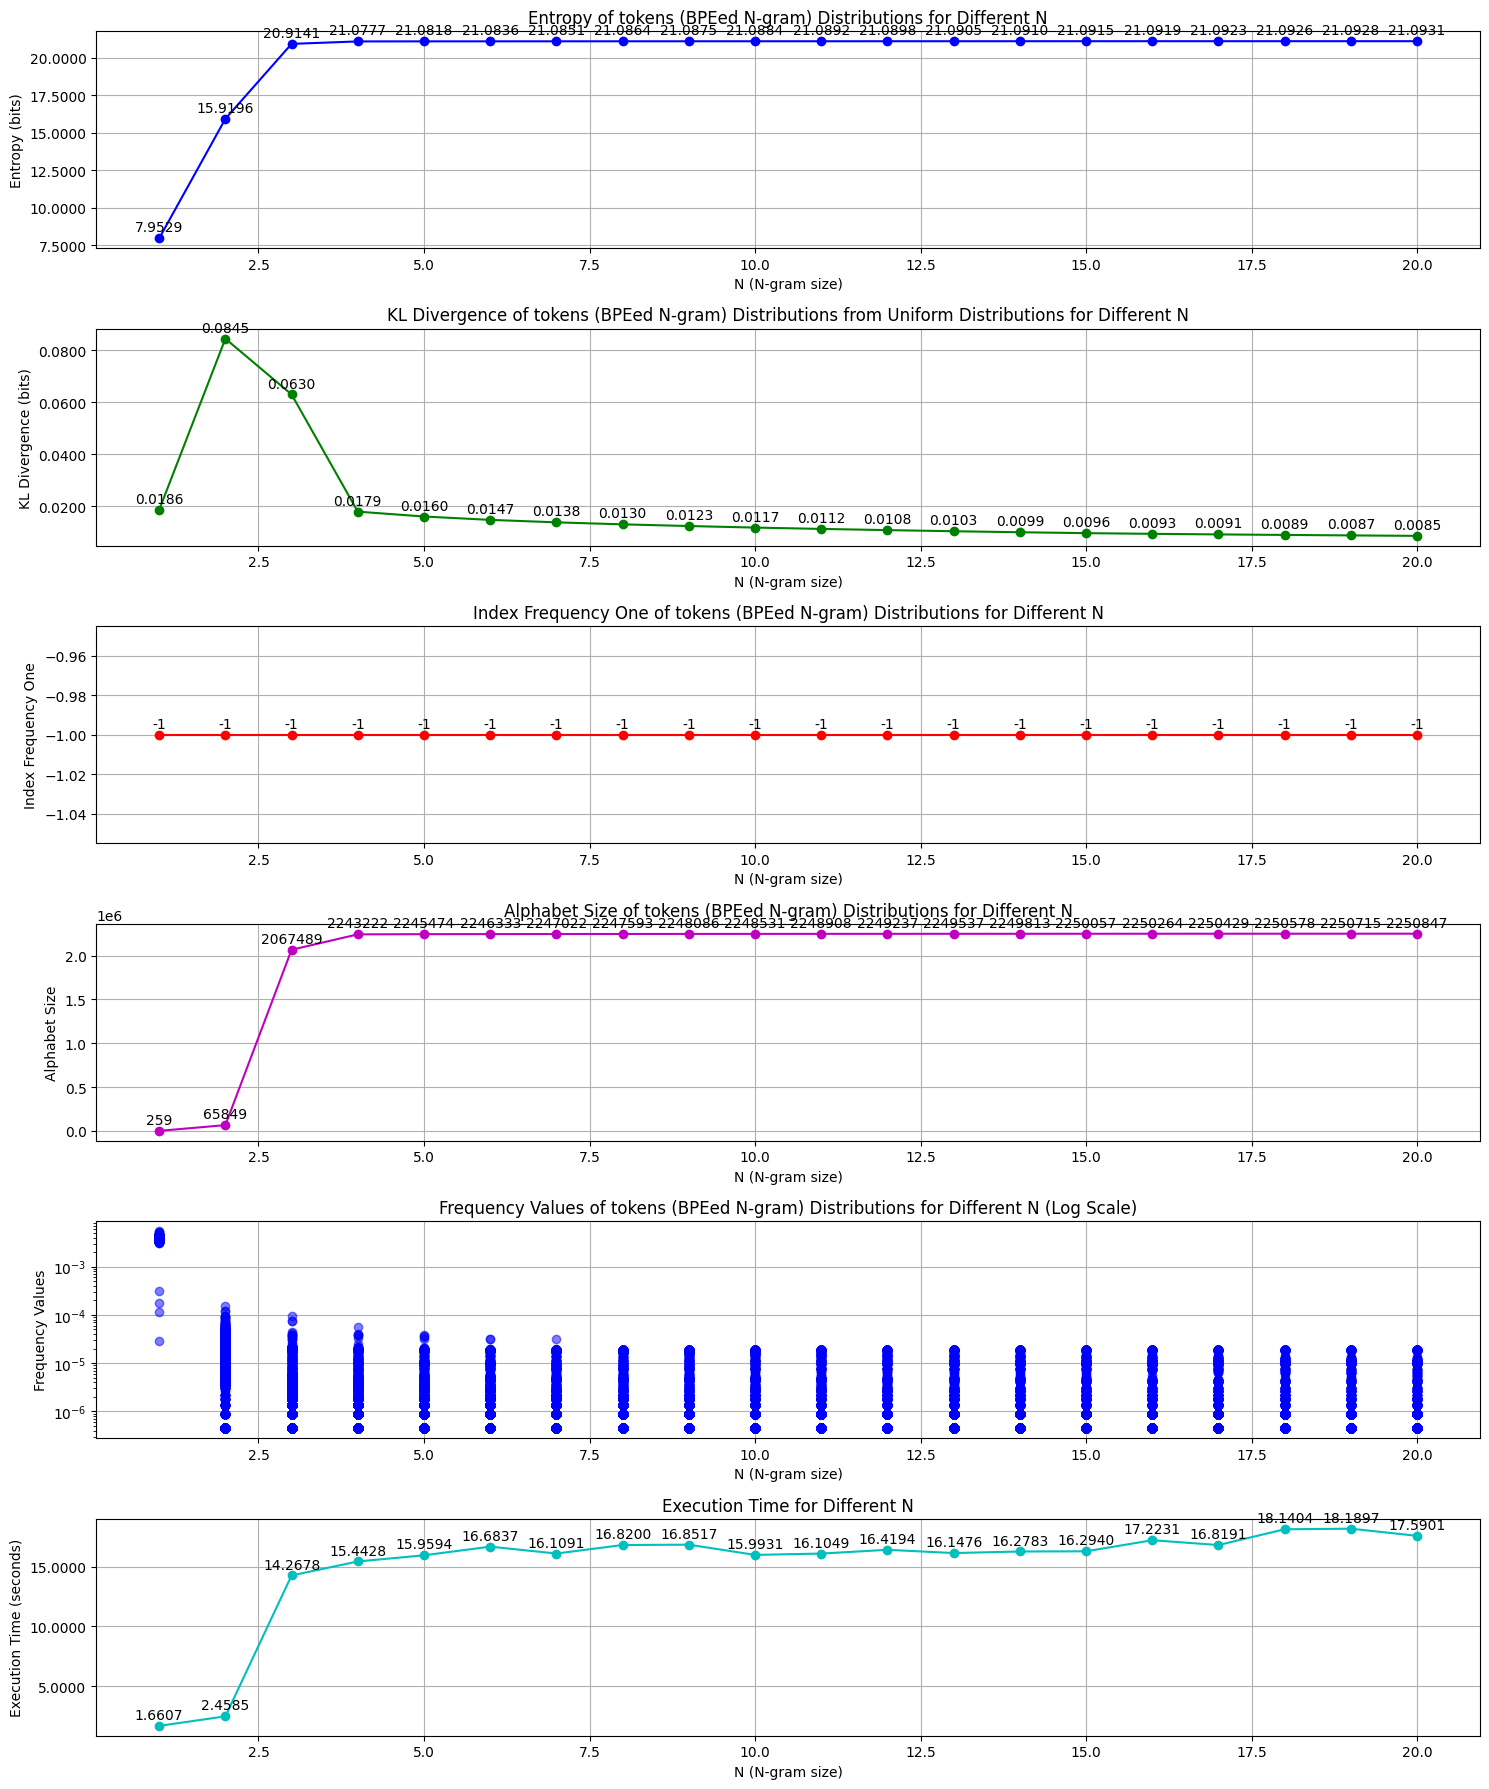

CPU times: user 1min 22s, sys: 2.31 s, total: 1min 24s
Wall time: 1min 24s


In [4]:
%%time 

# Extract values for plotting
N_values = [metric['N'] for metric in metrics]
entropies = [metric['entropy'] for metric in metrics]
kl_divergences = [metric['kl_divergence'] for metric in metrics]
index_frequencies = [metric['index_frequency_one'] if metric['index_frequency_one'] is not None else -1 for metric in metrics]
alphabet_sizes = [metric['alphabet_size'] for metric in metrics]
frequency_values = [metric['frequency_values'] for metric in metrics] if 'frequency_values' in metrics[0] else [[] for _ in metrics]
execution_times = [metric['execution_time'] for metric in metrics]

# Plotting the metrics
plt.figure(figsize=(15, 18))

# Plot entropy
plt.subplot(6, 1, 1)
plt.plot(N_values, entropies, marker='o', linestyle='-', color='b')
plt.title('Entropy of tokens (BPEed N-gram) Distributions for Different N')
plt.xlabel('N (N-gram size)')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.xticks(N_values)  # Set x-ticks to be integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))
for i, entropy in enumerate(entropies):
    plt.annotate(f'{entropy:.4f}', (N_values[i], entropies[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Plot KL divergence
plt.subplot(6, 1, 2)
plt.plot(N_values, kl_divergences, marker='o', linestyle='-', color='g')
plt.title('KL Divergence of tokens (BPEed N-gram) Distributions from Uniform Distributions for Different N')
plt.xlabel('N (N-gram size)')
plt.ylabel('KL Divergence (bits)')
plt.grid(True)
plt.xticks(N_values)  # Set x-ticks to be integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))
for i, kl_divergence in enumerate(kl_divergences):
    plt.annotate(f'{kl_divergence:.4f}', (N_values[i], kl_divergences[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Plot index where frequency drops to 1
plt.subplot(6, 1, 3)
plt.plot(N_values, index_frequencies, marker='o', linestyle='-', color='r')
plt.title('Index Frequency One of tokens (BPEed N-gram) Distributions for Different N')
plt.xlabel('N (N-gram size)')
plt.ylabel('Index Frequency One')
plt.grid(True)
plt.xticks(N_values)  # Set x-ticks to be integers
for i, index in enumerate(index_frequencies):
    plt.annotate(f'{index}', (N_values[i], index_frequencies[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Plot alphabet size
plt.subplot(6, 1, 4)
plt.plot(N_values, alphabet_sizes, marker='o', linestyle='-', color='m')
plt.title('Alphabet Size of tokens (BPEed N-gram) Distributions for Different N')
plt.xlabel('N (N-gram size)')
plt.ylabel('Alphabet Size')
plt.grid(True)
plt.xticks(N_values)  # Set x-ticks to be integers
for i, alphabet_size in enumerate(alphabet_sizes):
    plt.annotate(f'{alphabet_size}', (N_values[i], alphabet_sizes[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Plot frequency values (log scale)
plt.subplot(6, 1, 5)
for i, freq_vals in enumerate(frequency_values):
    plt.plot([N_values[i]] * len(freq_vals), freq_vals, 'bo', alpha=0.5)
plt.yscale('log')
plt.title('Frequency Values of tokens (BPEed N-gram) Distributions for Different N (Log Scale)')
plt.xlabel('N (N-gram size)')
plt.ylabel('Frequency Values')
plt.grid(True)
plt.xticks(N_values)  # Set x-ticks to be integers

# Plot execution time
plt.subplot(6, 1, 6)
plt.plot(N_values, execution_times, marker='o', linestyle='-', color='c')
plt.title('Execution Time for Different N')
plt.xlabel('N (N-gram size)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.xticks(N_values)  # Set x-ticks to be integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))
for i, exec_time in enumerate(execution_times):
    plt.annotate(f'{exec_time:.4f}', (N_values[i], execution_times[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()


In [5]:
# Generate Markdown table for the metrics
markdown_table = "| N | Entropy (bits) | KL Divergence (bits) | Index Frequency One | Alphabet Size | Execution Time (seconds) |\n"
markdown_table += "|---|----------------|----------------------|----------------------|---------------|-------------------------|\n"

for metric in metrics:
    N = metric['N']
    entropy = f"{metric['entropy']:.4f}"
    kl_divergence = f"{metric['kl_divergence']:.4f}"
    index_frequency_one = metric['index_frequency_one'] if metric['index_frequency_one'] is not None else "N/A"
    alphabet_size = metric['alphabet_size']
    execution_time = f"{metric['execution_time']:.4f}"
    
    markdown_table += f"| {N} | {entropy} | {kl_divergence} | {index_frequency_one} | {alphabet_size} | {execution_time} |\n"

# Render the Markdown table
display(Markdown(markdown_table))
print(markdown_table)

| N | Entropy (bits) | KL Divergence (bits) | Index Frequency One | Alphabet Size | Execution Time (seconds) |
|---|----------------|----------------------|----------------------|---------------|-------------------------|
| 1 | 7.9529 | 0.0186 | N/A | 259 | 1.6607 |
| 2 | 15.9196 | 0.0845 | N/A | 65849 | 2.4585 |
| 3 | 20.9141 | 0.0630 | N/A | 2067489 | 14.2678 |
| 4 | 21.0777 | 0.0179 | N/A | 2243222 | 15.4428 |
| 5 | 21.0818 | 0.0160 | N/A | 2245474 | 15.9594 |
| 6 | 21.0836 | 0.0147 | N/A | 2246333 | 16.6837 |
| 7 | 21.0851 | 0.0138 | N/A | 2247022 | 16.1091 |
| 8 | 21.0864 | 0.0130 | N/A | 2247593 | 16.8200 |
| 9 | 21.0875 | 0.0123 | N/A | 2248086 | 16.8517 |
| 10 | 21.0884 | 0.0117 | N/A | 2248531 | 15.9931 |
| 11 | 21.0892 | 0.0112 | N/A | 2248908 | 16.1049 |
| 12 | 21.0898 | 0.0108 | N/A | 2249237 | 16.4194 |
| 13 | 21.0905 | 0.0103 | N/A | 2249537 | 16.1476 |
| 14 | 21.0910 | 0.0099 | N/A | 2249813 | 16.2783 |
| 15 | 21.0915 | 0.0096 | N/A | 2250057 | 16.2940 |
| 16 | 21.0919 | 0.0093 | N/A | 2250264 | 17.2231 |
| 17 | 21.0923 | 0.0091 | N/A | 2250429 | 16.8191 |
| 18 | 21.0926 | 0.0089 | N/A | 2250578 | 18.1404 |
| 19 | 21.0928 | 0.0087 | N/A | 2250715 | 18.1897 |
| 20 | 21.0931 | 0.0085 | N/A | 2250847 | 17.5901 |


| N | Entropy (bits) | KL Divergence (bits) | Index Frequency One | Alphabet Size | Execution Time (seconds) |
|---|----------------|----------------------|----------------------|---------------|-------------------------|
| 1 | 7.9529 | 0.0186 | N/A | 259 | 1.6607 |
| 2 | 15.9196 | 0.0845 | N/A | 65849 | 2.4585 |
| 3 | 20.9141 | 0.0630 | N/A | 2067489 | 14.2678 |
| 4 | 21.0777 | 0.0179 | N/A | 2243222 | 15.4428 |
| 5 | 21.0818 | 0.0160 | N/A | 2245474 | 15.9594 |
| 6 | 21.0836 | 0.0147 | N/A | 2246333 | 16.6837 |
| 7 | 21.0851 | 0.0138 | N/A | 2247022 | 16.1091 |
| 8 | 21.0864 | 0.0130 | N/A | 2247593 | 16.8200 |
| 9 | 21.0875 | 0.0123 | N/A | 2248086 | 16.8517 |
| 10 | 21.0884 | 0.0117 | N/A | 2248531 | 15.9931 |
| 11 | 21.0892 | 0.0112 | N/A | 2248908 | 16.1049 |
| 12 | 21.0898 | 0.0108 | N/A | 2249237 | 16.4194 |
| 13 | 21.0905 | 0.0103 | N/A | 2249537 | 16.1476 |
| 14 | 21.0910 | 0.0099 | N/A | 2249813 | 16.2783 |
| 15 | 21.0915 | 0.0096 | N/A | 2250057 | 16.2940 |
| 16 | 21.0919 |

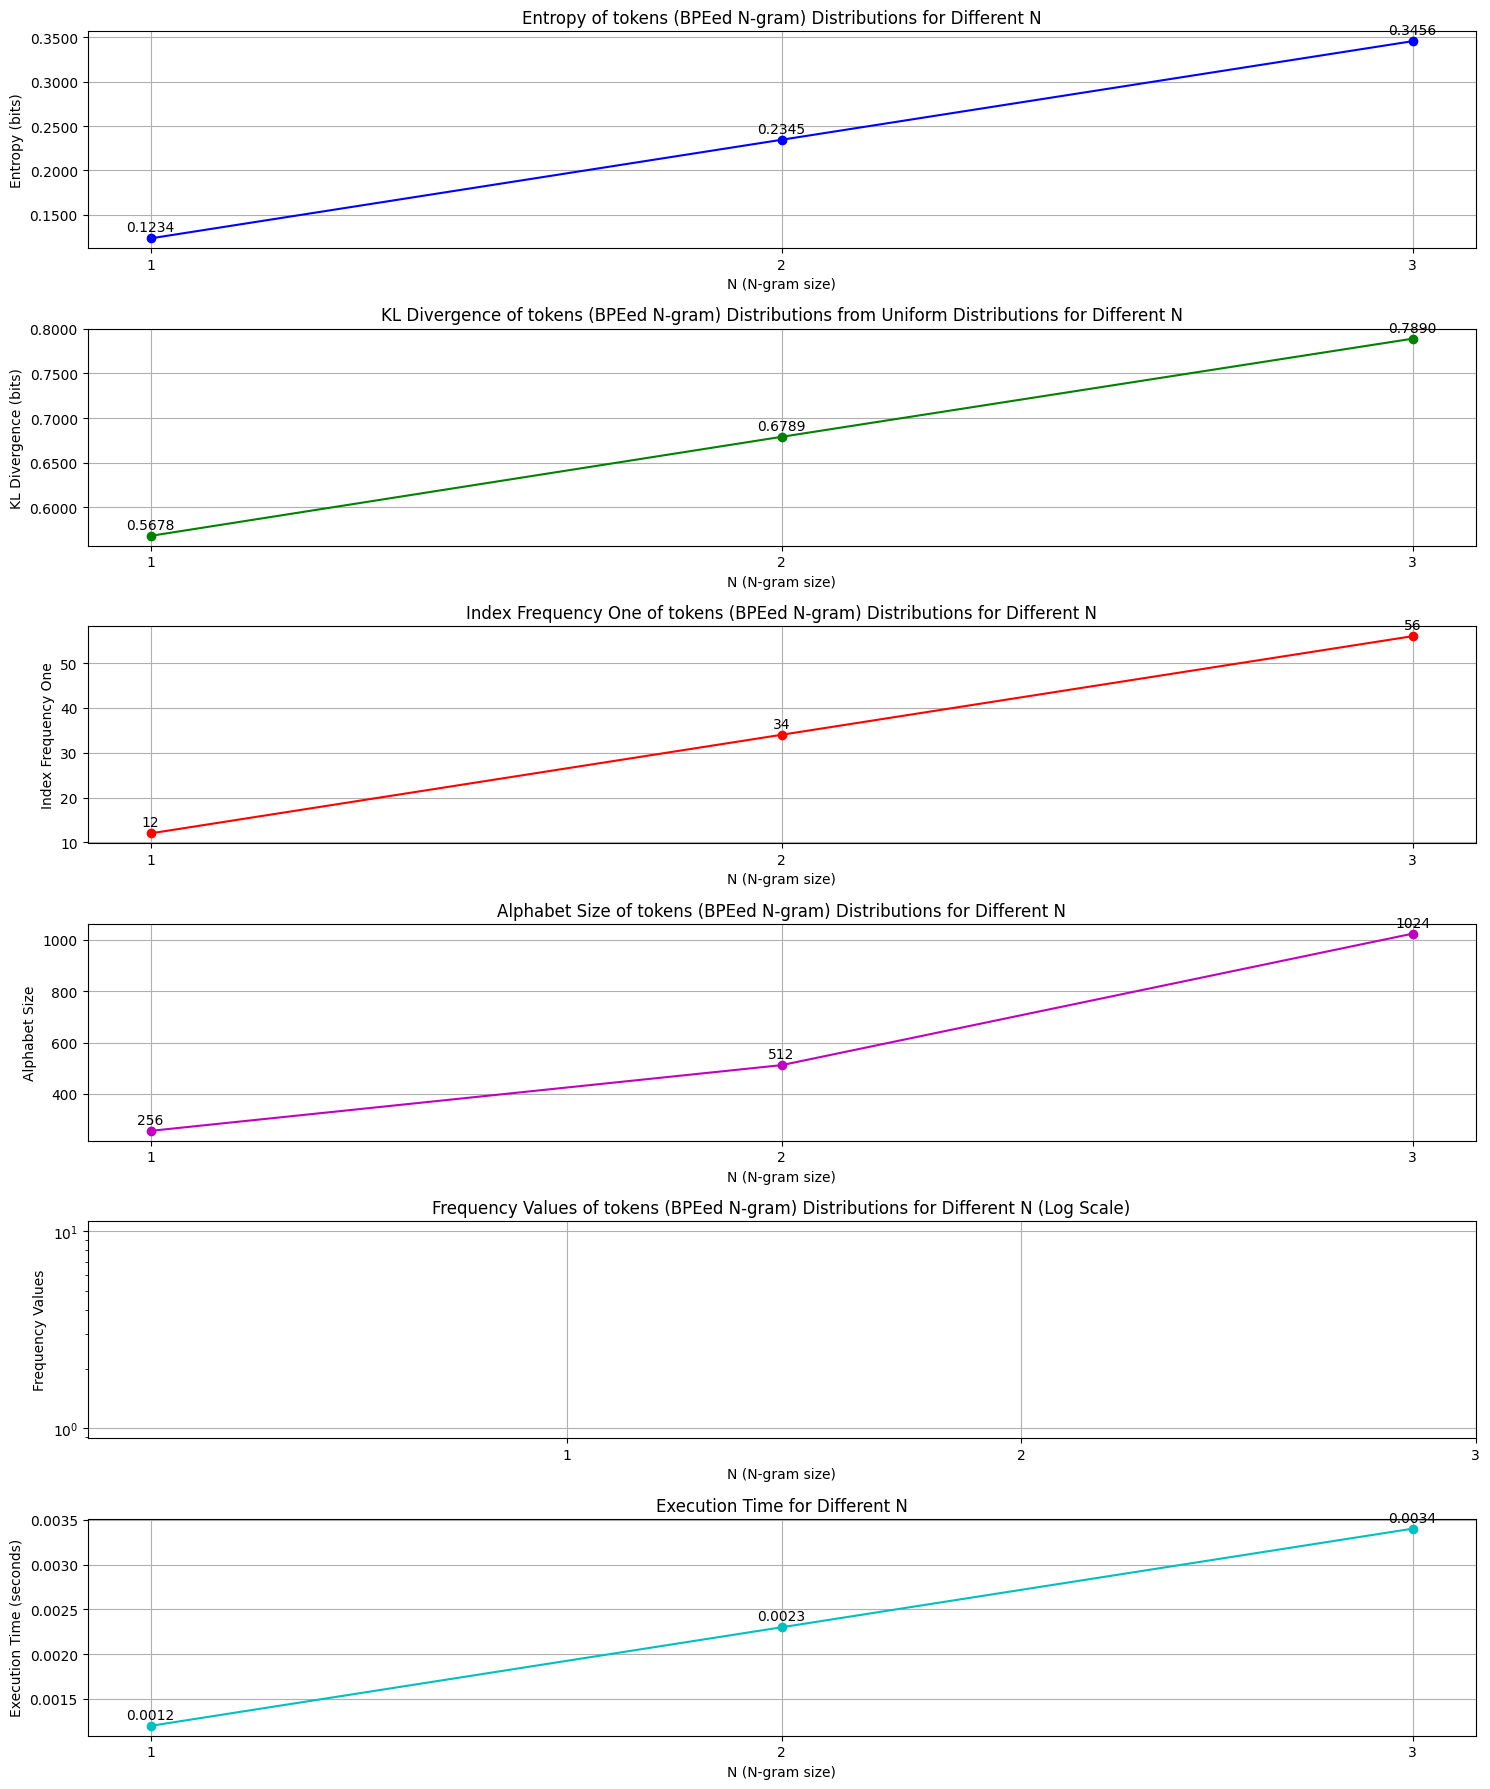